In [1]:
import pandas as pd
from numpy import var, std, mean
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

covid = pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")

# Se va a hacer una revision de los casos reportados de Covid en Colombia

In [2]:
print(covid.head())

   OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0       552             1            1              0                  0   
1       553             0            1              0                  0   
2       554             0            1              0                  0   
3       555             2            3              0                  0   
4       556             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  2cfd33e7-935e-466d-be97-cd9c1d3dfd74   
1  2020/03/07 05:00:00+00  2ed4fae9-ea93-4293-b022-07daa41de2bf   
2  2020/03/08 05:00:00+00  5963f6b6-a3ba-4a24-9cf8-f72a13c7d9d2   
3  2020/03/09 05:00:00+00  ba20e7c9-1abc-4921-a29f-d61c198b7863   
4  2020/03/10 05:00:00+00  87e523f6-d767-4f41-a04c-371b7f46bf52   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  
0               0                  0  
1               0                  0  
2               0      

Se van a eliminar las columnas `GlobalID` y `OBJECTID` puesto que no aportan para el analisis estadistico

In [3]:
def exploracion(Columnas):
    filas, columnas = covid.shape

    Cantidad_Global_Id = len(covid["GlobalID"].unique())

    Cantidad_Object_Id = len(covid['OBJECTID'].unique())

    for col in Columnas:
        cantidad = len(covid[col].unique())
        mensaje = "Todos los valores en {} son unicos".format(col) if filas == Cantidad_Global_Id else "Hay valores repetidos en {}".format(col)
        print(mensaje)
        
Columnas = ["GlobalID","OBJECTID"]        

exploracion(Columnas)

Todos los valores en GlobalID son unicos
Todos los valores en OBJECTID son unicos


In [4]:
def eliminar_columnas(Columnas):
    covid.drop(Columnas,axis=1,inplace=True)
    
eliminar_columnas(Columnas)
    
covid.rename(columns = {'NUEVO_RECUPERADOS':'NUEVOS_RECUPERADOS'}, inplace = True)

print(covid.columns)

Index(['NUEVOS_CASOS', 'TOTAL_CASOS', 'TOTAL_MUERTES', 'TOTAL_RECUPERADOS',
       'FECHA_ACTUALIZACION', 'NUEVOS_MUERTOS', 'NUEVOS_RECUPERADOS'],
      dtype='object')


In [5]:
print(covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUEVOS_CASOS         563 non-null    int64 
 1   TOTAL_CASOS          563 non-null    int64 
 2   TOTAL_MUERTES        563 non-null    int64 
 3   TOTAL_RECUPERADOS    563 non-null    int64 
 4   FECHA_ACTUALIZACION  563 non-null    object
 5   NUEVOS_MUERTOS       563 non-null    int64 
 6   NUEVOS_RECUPERADOS   563 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 30.9+ KB
None


Se van a corregir la columna de la fecha de actualizacion. Se va a transformar en tipo "datetime"

In [6]:
fecha = list(covid["FECHA_ACTUALIZACION"])

print(type(fecha))

fecha = [x[:10] for x in fecha]

print(fecha[0])

fecha = [pd.to_datetime((x),format = "%Y/%m/%d") for x in fecha]

print(fecha[0])

print(type(fecha[0]))

fecha_actualizacion = pd.Series(fecha)

covid["FECHA_ACTUALIZACION"] = fecha_actualizacion


<class 'list'>
2020/03/06
2020-03-06 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Se va a reorganizar el order de las columnas y revisar que las actualizaciones

In [7]:
covid = covid[['FECHA_ACTUALIZACION','NUEVOS_CASOS','TOTAL_CASOS','NUEVOS_RECUPERADOS','TOTAL_RECUPERADOS','NUEVOS_MUERTOS','TOTAL_MUERTES']]

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FECHA_ACTUALIZACION  563 non-null    datetime64[ns]
 1   NUEVOS_CASOS         563 non-null    int64         
 2   TOTAL_CASOS          563 non-null    int64         
 3   NUEVOS_RECUPERADOS   563 non-null    int64         
 4   TOTAL_RECUPERADOS    563 non-null    int64         
 5   NUEVOS_MUERTOS       563 non-null    int64         
 6   TOTAL_MUERTES        563 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 30.9 KB


In [8]:
covid.describe()

,NUEVOS_CASOS,TOTAL_CASOS,NUEVOS_RECUPERADOS,TOTAL_RECUPERADOS,NUEVOS_MUERTOS,TOTAL_MUERTES
count,563.000000,5.630000e+02,563.000000,5.630000e+02,563.000000,563.000000
mean,8776.165187,1.817702e+06,8489.381883,1.691804e+06,223.612789,47694.685613
std,7512.047224,1.638940e+06,7507.712693,1.579382e+06,171.316244,41054.850725
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,3033.000000,2.371680e+05,2109.500000,1.167655e+05,95.000000,8122.000000
50%,7523.000000,1.417072e+06,7209.000000,1.310425e+06,187.000000,38866.000000
75%,12085.500000,2.885700e+06,12499.500000,2.693496e+06,325.000000,74457.500000
max,33594.000000,4.941064e+06,37904.000000,4.779552e+06,754.000000,125895.000000


In [9]:
print(covid.head())

print(covid.tail())

  FECHA_ACTUALIZACION  NUEVOS_CASOS  TOTAL_CASOS  NUEVOS_RECUPERADOS  \
0          2020-03-06             1            1                   0   
1          2020-03-07             0            1                   0   
2          2020-03-08             0            1                   0   
3          2020-03-09             2            3                   0   
4          2020-03-10             0            3                   0   

   TOTAL_RECUPERADOS  NUEVOS_MUERTOS  TOTAL_MUERTES  
0                  0               0              0  
1                  0               0              0  
2                  0               0              0  
3                  0               0              0  
4                  0               0              0  
    FECHA_ACTUALIZACION  NUEVOS_CASOS  TOTAL_CASOS  NUEVOS_RECUPERADOS  \
558          2021-09-15          1570      4934568                1774   
559          2021-09-16          1484      4936052                1762   
560          2021-09-

# Se revisará los datos arrojados por los casos nuevos

8776.165186500888


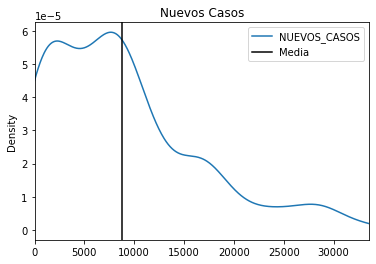

In [20]:
nc = covid["NUEVOS_CASOS"]
nc.plot.kde(xlim = [nc.min(),nc.max()])
mean = nc.mean()
plt.axvline(mean,color = 'black',label = 'Media')
plt.title("Nuevos Casos")
plt.legend();


Al revisar los casos nuevos, se puede apreciar que hay una acumulación de casos cerca a los 8000, donde la media es de alrededor de 8800 casos nuevos y que los reportes por casos nuevos disminuyen a partir de los 9000 aproximadamente

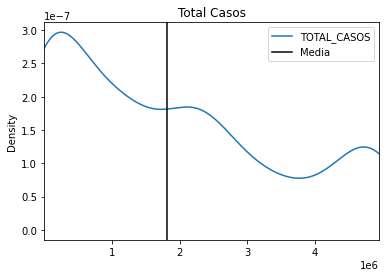

In [11]:
tc = covid["TOTAL_CASOS"]
tc.plot.kde(xlim = [tc.min(),tc.max()])
mean = tc.mean()
plt.axvline(mean,color = 'black',label = 'Media')
plt.title("Total Casos")
plt.legend();

## Se va a analizar la relacion entre la cantidad de muertos y los casos

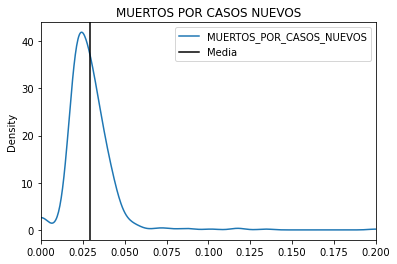

In [12]:
covid['MUERTOS_POR_CASOS_NUEVOS'] = covid['NUEVOS_MUERTOS']/covid['NUEVOS_CASOS']

mcn = covid["MUERTOS_POR_CASOS_NUEVOS"]
mcn.plot.kde(xlim = [mcn.min(),mcn.max()])
mean = mcn.mean()
plt.axvline(mean,color = 'black',label = 'Media')
plt.title("MUERTOS POR CASOS NUEVOS")
plt.legend();

En relación a los muertos por casos nuevos, se aprecia que la razón más común es de 2.5% de muertos por casos nuevos. Por lo que quiere decir que hay una baja tasa de mortalidad en relación a los casos nuevos que se van presentando

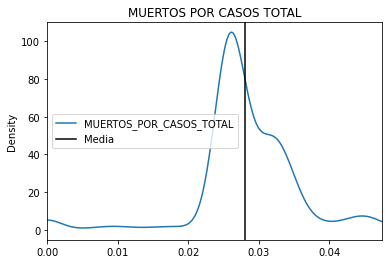

In [13]:

covid['MUERTOS_POR_CASOS_TOTAL'] = covid['TOTAL_MUERTES']/covid['TOTAL_CASOS']

mct = covid["MUERTOS_POR_CASOS_TOTAL"]
mct.plot.kde(xlim = [mct.min(),mct.max()])
mean = mct.mean()
plt.axvline(mean,color = 'black',label = 'Media')
plt.title("MUERTOS POR CASOS TOTAL")
plt.legend();

En relación a los muertos por casos totales, se aprecia que la razón más común es de 2.5%, consistente con la tasa de muertos por casos nuevos. Es una cifra que muestra que la tasa de mortalidad es baja en relación con los casos presentados.

## Se va a analizar la relacion entre los recuperados y los casos

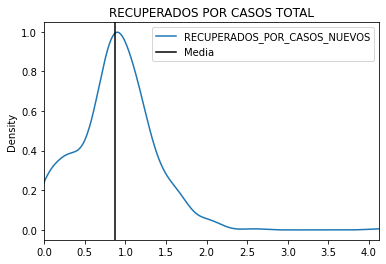

In [14]:
covid['RECUPERADOS_POR_CASOS_NUEVOS'] = covid['NUEVOS_RECUPERADOS']/covid['NUEVOS_CASOS']

rcn = covid["RECUPERADOS_POR_CASOS_NUEVOS"]
rcn.plot.kde(xlim = [rcn.min(),rcn.max()])
mean = rcn.mean()
plt.axvline(mean,color = 'black',label = 'Media')
plt.title("RECUPERADOS POR CASOS TOTAL")
plt.legend();

En relación a los recuperados por casos nuevos, se ve un pico en una relación de 100%, es decir que por cada paciente que presenta síntomas, hay una persona que se reporta como recuperado del Covid. 

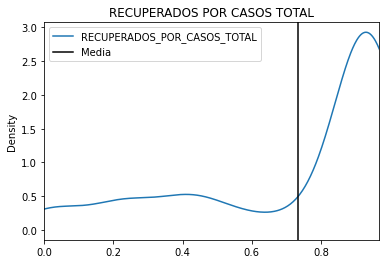

In [15]:
covid['RECUPERADOS_POR_CASOS_TOTAL'] = covid['TOTAL_RECUPERADOS']/covid['TOTAL_CASOS']

rct = covid["RECUPERADOS_POR_CASOS_TOTAL"]
rct.plot.kde(xlim = [rct.min(),rct.max()])
mean = rct.mean()
plt.axvline(mean,color = 'black',label = 'Media')
plt.title("RECUPERADOS POR CASOS TOTAL")
plt.legend();

En relación a recuperados totales respecto a casos totales, se aprecia que el pico se da en una relación del 100%, es decir, la mayor parte de las veces hay la misma cantidad de recuperados que de personas que hayan sido reportadas como paciente con Covid.

In [16]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   FECHA_ACTUALIZACION           563 non-null    datetime64[ns]
 1   NUEVOS_CASOS                  563 non-null    int64         
 2   TOTAL_CASOS                   563 non-null    int64         
 3   NUEVOS_RECUPERADOS            563 non-null    int64         
 4   TOTAL_RECUPERADOS             563 non-null    int64         
 5   NUEVOS_MUERTOS                563 non-null    int64         
 6   TOTAL_MUERTES                 563 non-null    int64         
 7   MUERTOS_POR_CASOS_NUEVOS      560 non-null    float64       
 8   MUERTOS_POR_CASOS_TOTAL       563 non-null    float64       
 9   RECUPERADOS_POR_CASOS_NUEVOS  560 non-null    float64       
 10  RECUPERADOS_POR_CASOS_TOTAL   563 non-null    float64       
dtypes: datetime64[ns](1), float64(4)

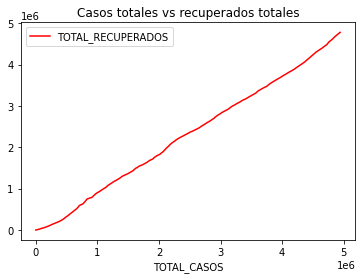

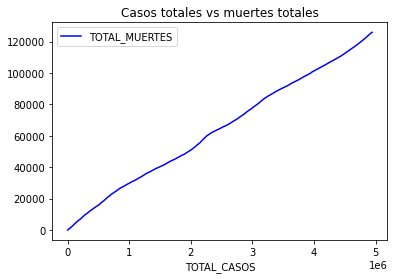

In [17]:
covid.plot(kind='line',x='TOTAL_CASOS',y='TOTAL_RECUPERADOS',color='red',title = "Casos totales vs recuperados totales")
covid.plot(kind='line',x='TOTAL_CASOS',y='TOTAL_MUERTES',color='blue',title = "Casos totales vs muertes totales")
plt.show()


Por lo anterior, se puede apreciar que hay una relación positiva entre la cantidad de pacientes con Covid y la cantidad de recuperados. De la misma manera, hay una relación positiva entre la cantidad de pacientes con Covid y la cantidad de fallecidos. 

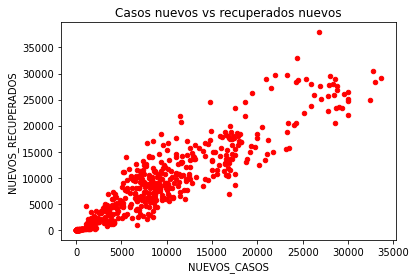

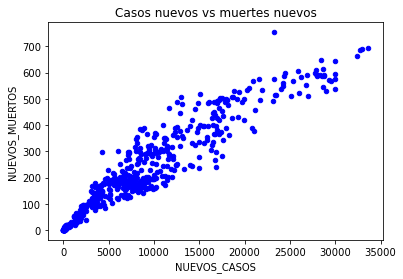

In [21]:
covid.plot(kind='scatter',x='NUEVOS_CASOS',y='NUEVOS_RECUPERADOS',color='red',title = "Casos nuevos vs recuperados nuevos")
covid.plot(kind='scatter',x='NUEVOS_CASOS',y='NUEVOS_MUERTOS',color='blue',title = "Casos nuevos vs muertes nuevos")
plt.show()

Respecto a los nuevos casos, es posible determinar que también hay una relación positiva entre los casos nuevos los recuperados nuevos, al igual que hay una relación positiva entre los casos nuevos y los muertos nuevos, sin embargo, no es una relación lineal como en los casos totales. 

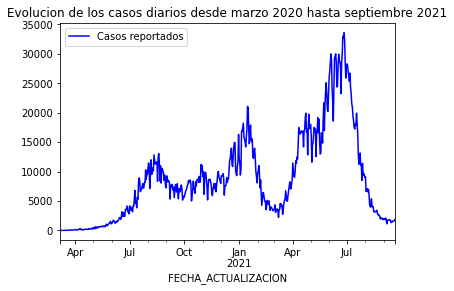

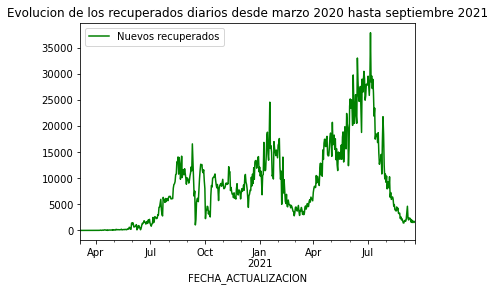

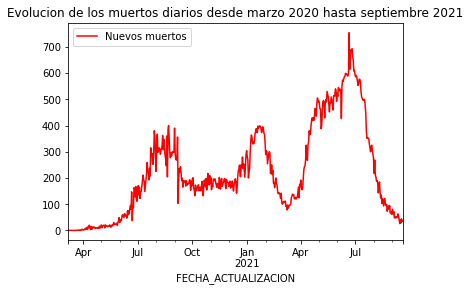

In [19]:
covid.plot(kind='line', x='FECHA_ACTUALIZACION', y='NUEVOS_CASOS', color='blue', title = "Evolucion de los casos diarios desde marzo 2020 hasta septiembre 2021",label = "Casos reportados")
covid.plot(kind='line', x='FECHA_ACTUALIZACION', y='NUEVOS_RECUPERADOS', color='green', title = "Evolucion de los recuperados diarios desde marzo 2020 hasta septiembre 2021",label = "Nuevos recuperados")
covid.plot(kind='line', x='FECHA_ACTUALIZACION', y='NUEVOS_MUERTOS', color='red', title = "Evolucion de los muertos diarios desde marzo 2020 hasta septiembre 2021",label = "Nuevos muertos")
plt.show()

Se puede ver una fuerte relación entre los casos de contagiados, recuperados y muertos, debido a que en las temporadas de vacaciones los contagios se dispararon, ya que en julio y diciembre, se pueden apreciar los picos en las tres gráficas. Los casos, a pesar de tener vacunados y tener mayor conciencia de los efectos del Covid en general, tuvieron su mayor pico en las últimas vacaciones de verano. 